# **Part 1: Model Selection and Hyper-parameters Tunning**

In [74]:
import pandas as pd
data = pd.read_csv("data_reg.csv")
print(data)

           x1        x2         y
0    0.548814  0.311796  0.547818
1    0.715189  0.696343  0.576032
2    0.602763  0.377752  0.113475
3    0.544883  0.179604  1.072286
4    0.423655  0.024679  0.624525
..        ...       ...       ...
195  0.490459  0.958983  0.937128
196  0.227415  0.355369  0.673893
197  0.254356  0.356707  0.415438
198  0.058029  0.016329  2.306756
199  0.434417  0.185232 -0.245479

[200 rows x 3 columns]


I can see that the array has 200 rows with 2 features and one continuous label.

In [75]:
training_set = data[:120]
print("Training Set :\n", training_set)
validation_set = data[120:160]
print("Validation Set :\n", validation_set)
testing_set = data[160:]
print("Testing Set :\n", testing_set)

Training Set :
            x1        x2         y
0    0.548814  0.311796  0.547818
1    0.715189  0.696343  0.576032
2    0.602763  0.377752  0.113475
3    0.544883  0.179604  1.072286
4    0.423655  0.024679  0.624525
..        ...       ...       ...
115  0.396506  0.245367  0.493161
116  0.881103  0.420539  1.418913
117  0.581273  0.557369  0.129485
118  0.881735  0.860551  2.578728
119  0.692532  0.727044 -0.741409

[120 rows x 3 columns]
Validation Set :
            x1        x2         y
120  0.725254  0.270328  0.486485
121  0.501324  0.131483  0.813994
122  0.956084  0.055374  2.835160
123  0.643990  0.301599 -0.304306
124  0.423855  0.262118  0.775401
125  0.606393  0.456141  0.261249
126  0.019193  0.683281  1.994160
127  0.301575  0.695625  0.742481
128  0.660174  0.283519  0.901669
129  0.290078  0.379927  0.515408
130  0.618015  0.181151  1.047882
131  0.428769  0.788546  0.506162
132  0.135474  0.056848  2.113095
133  0.298282  0.696997  0.021230
134  0.569965  0.778695 

Splitting the data to first 120 example as training, next 40 as validation to select model and the last 40 for testing.

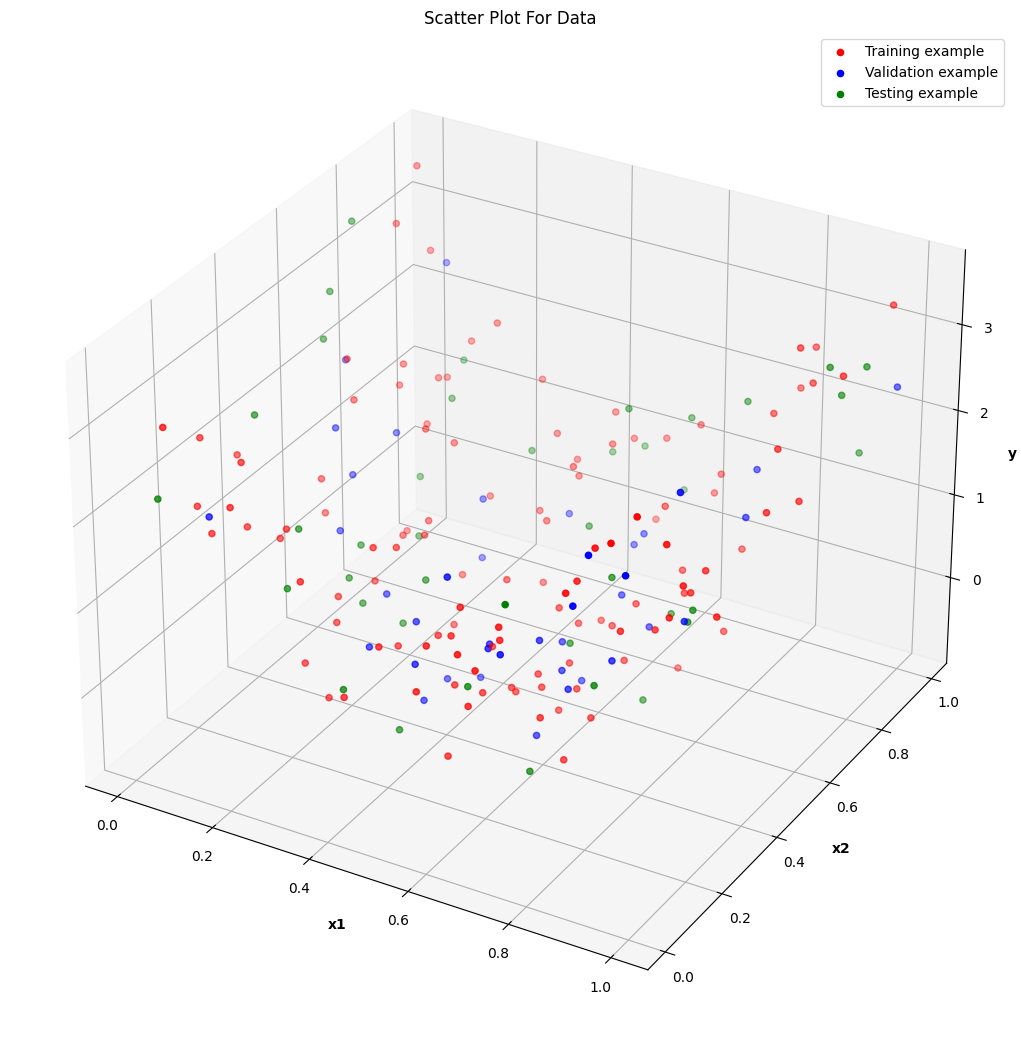

In [76]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 13))
ax = plt.axes(projection ="3d")

ax.scatter3D(training_set['x1'], training_set['x2'], training_set['y'], color = "red", label='Training example')
ax.scatter3D(validation_set['x1'], validation_set['x2'], validation_set['y'], color = "blue", label='Validation example')
ax.scatter3D(testing_set['x1'], testing_set['x2'], testing_set['y'], color = "green", label='Testing example')

plt.title("Scatter Plot For Data")
ax.set_xlabel('x1', fontweight ='bold')
ax.set_ylabel('x2', fontweight ='bold')
ax.set_zlabel('y', fontweight ='bold')
ax.legend()

plt.show()


The 3D scatter plot for all data examples each example set has different color as indicated in figure labels. also with feature x1 on x-axis, feature x2 on y-axis and label y on z-axis

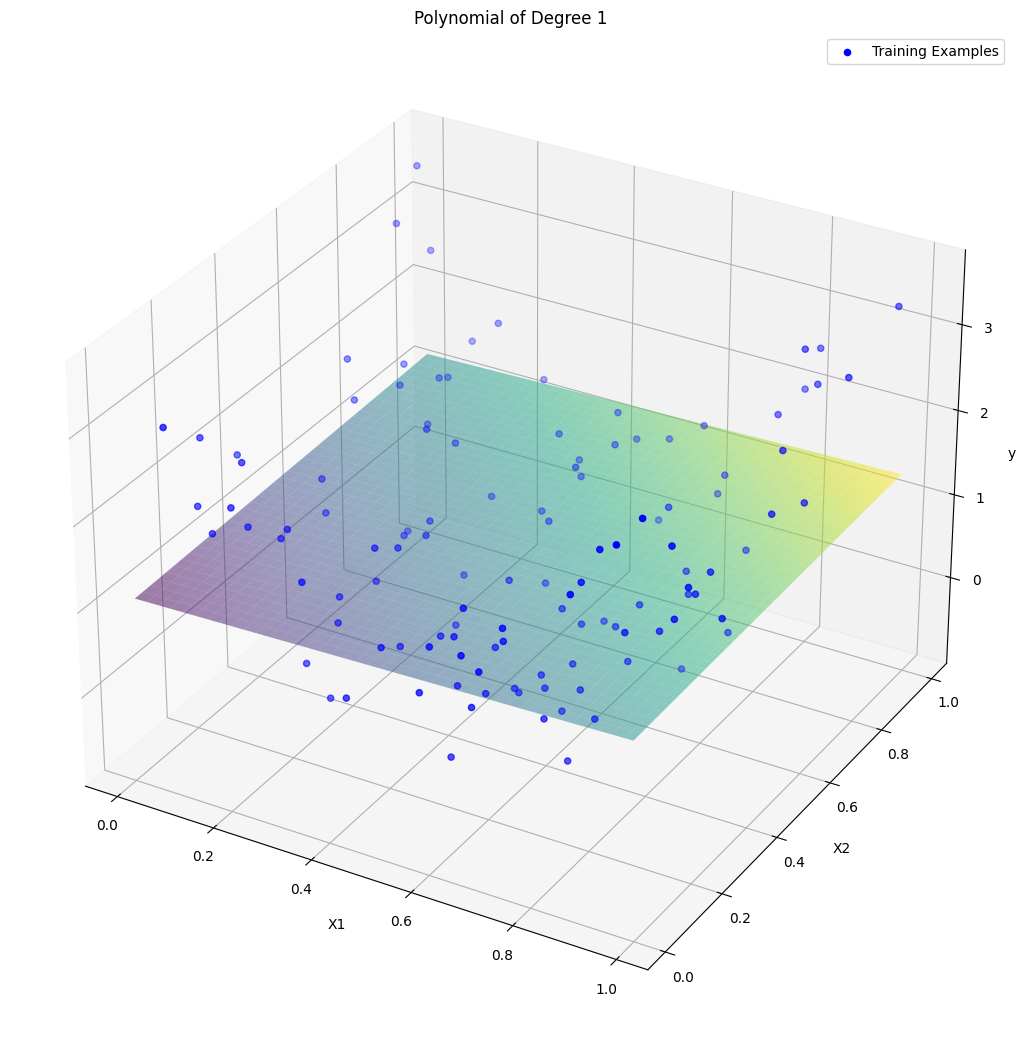

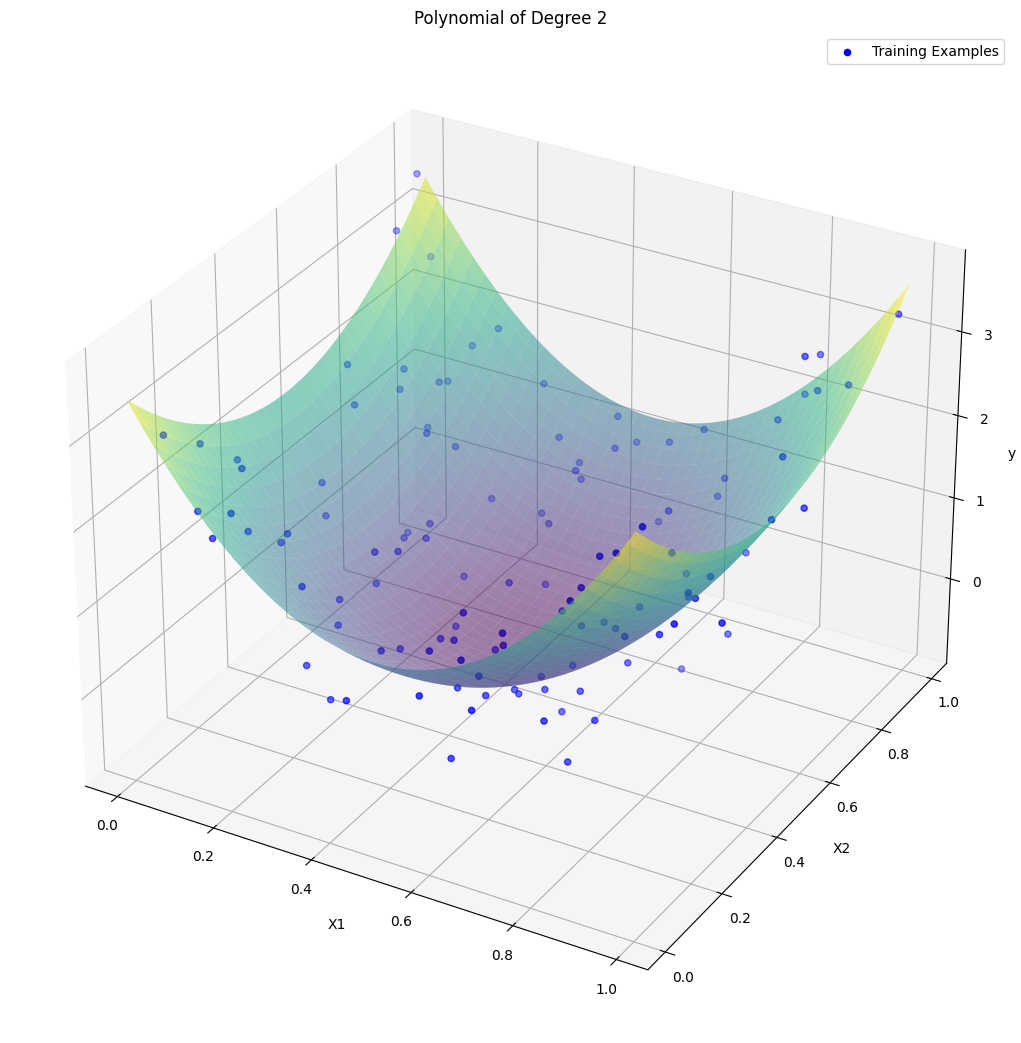

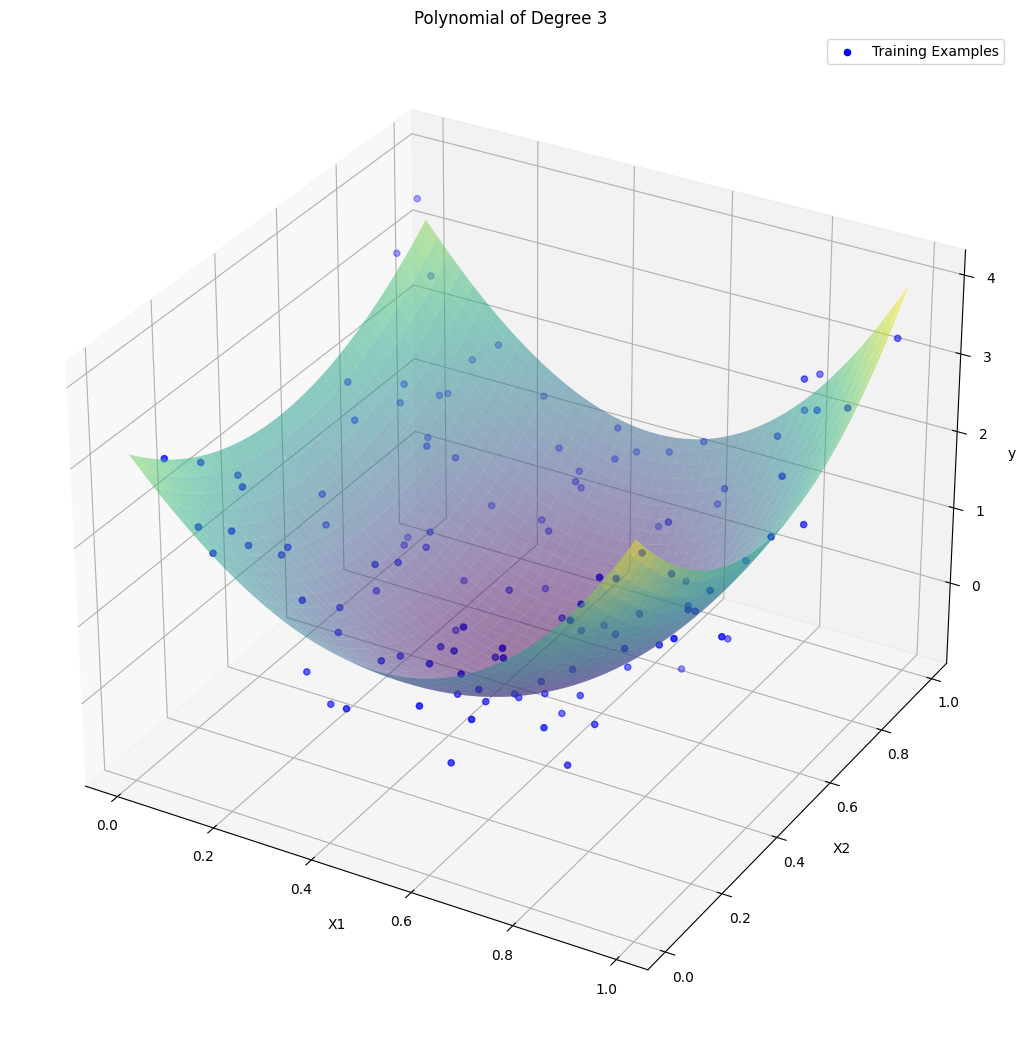

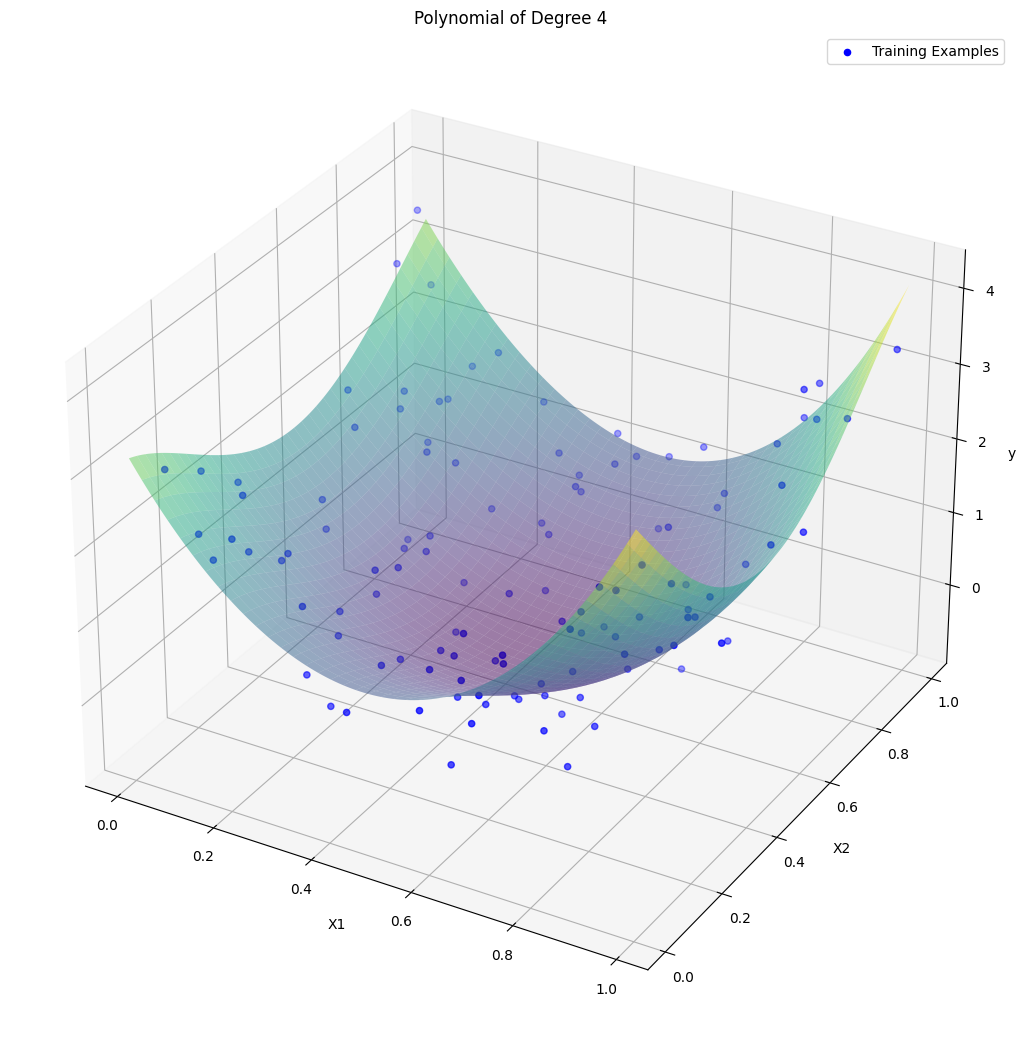

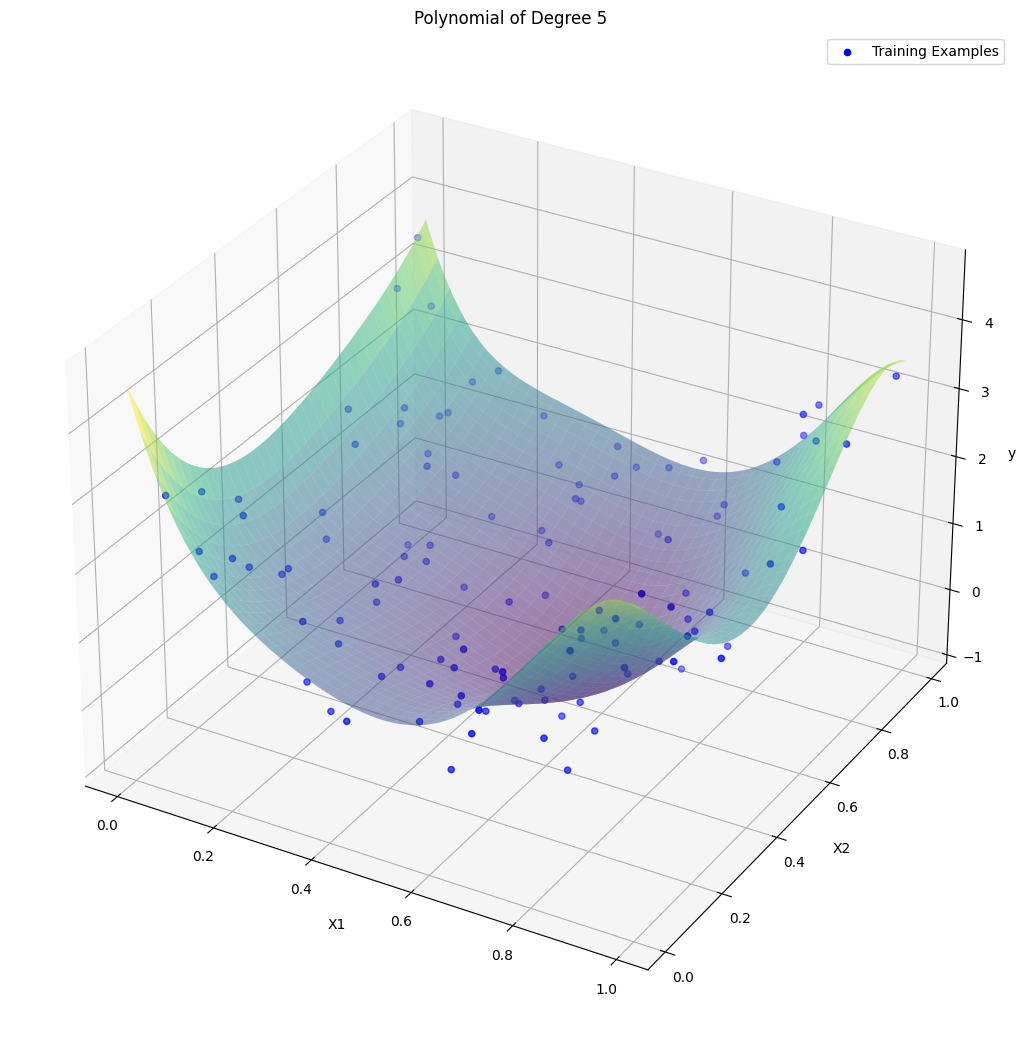

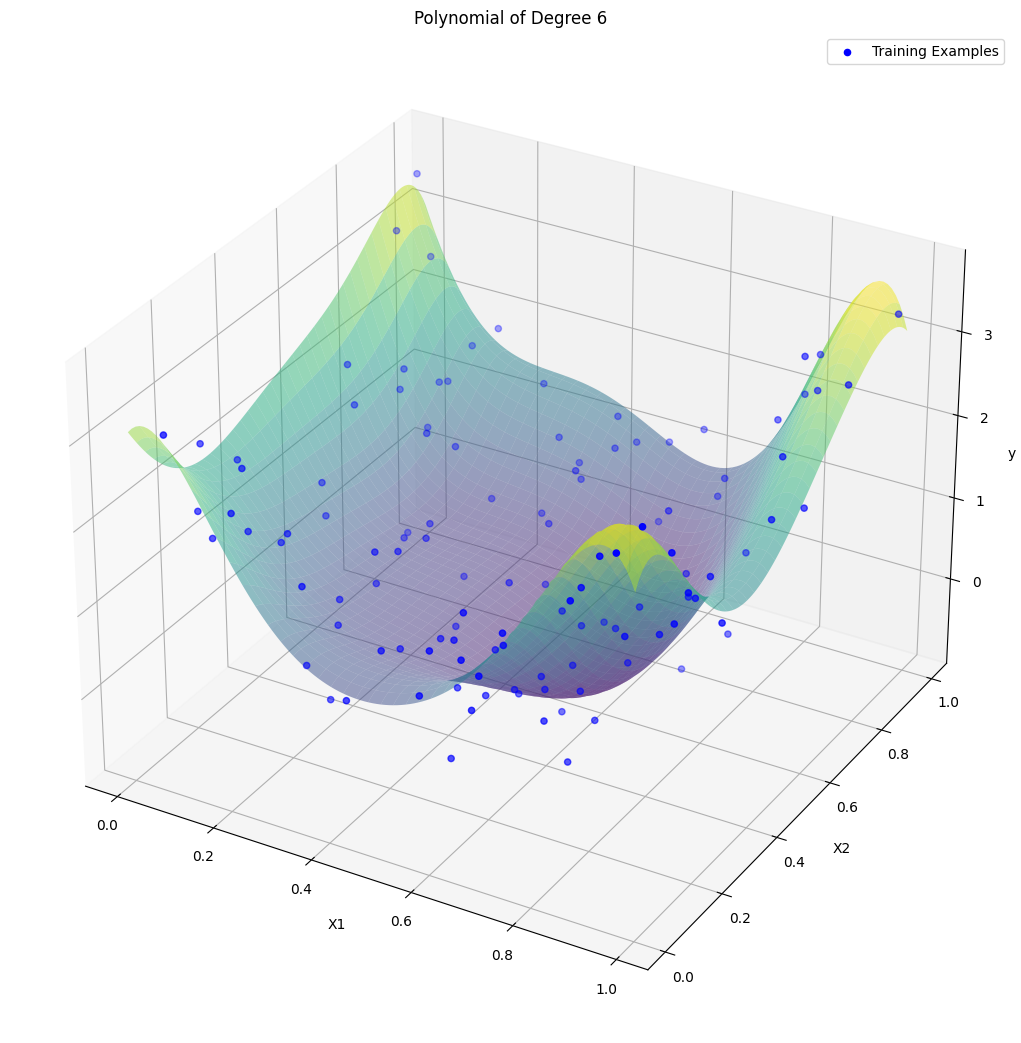

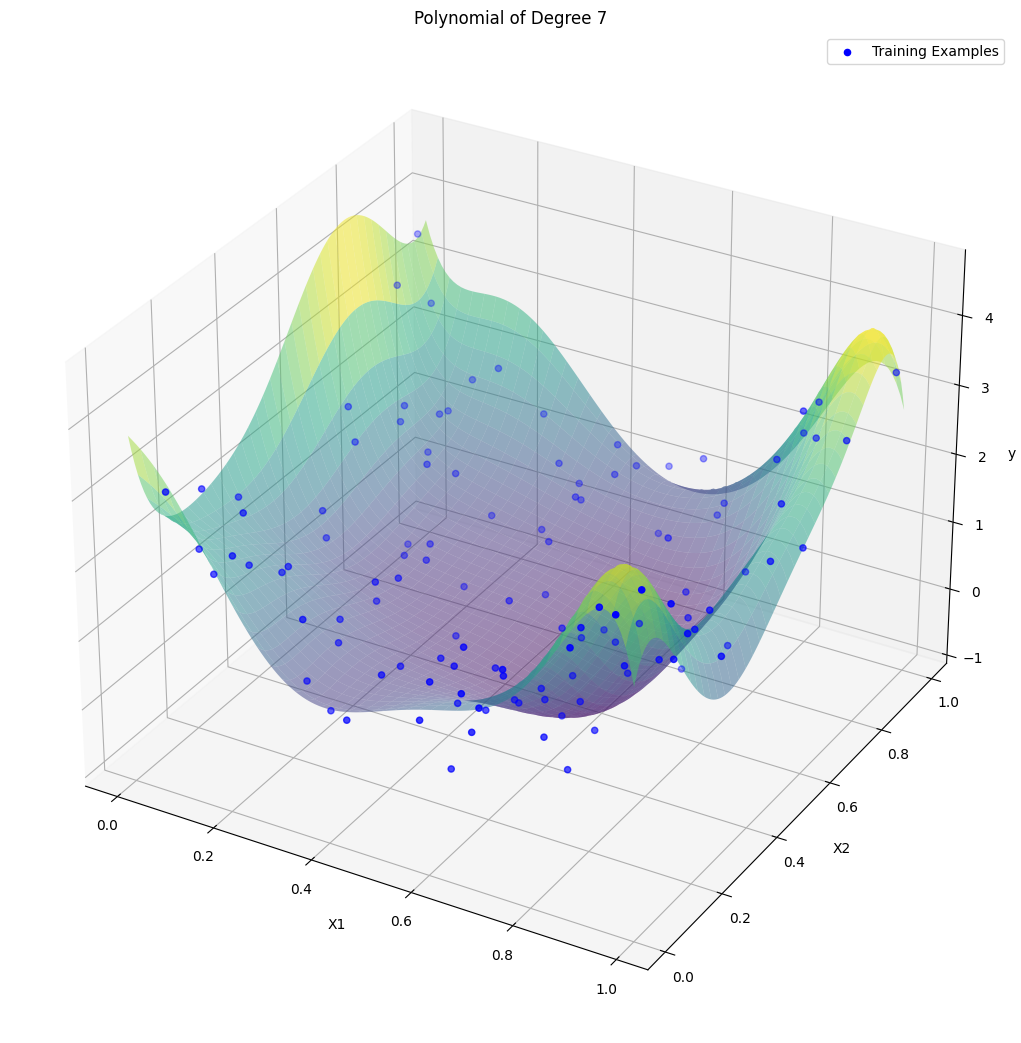

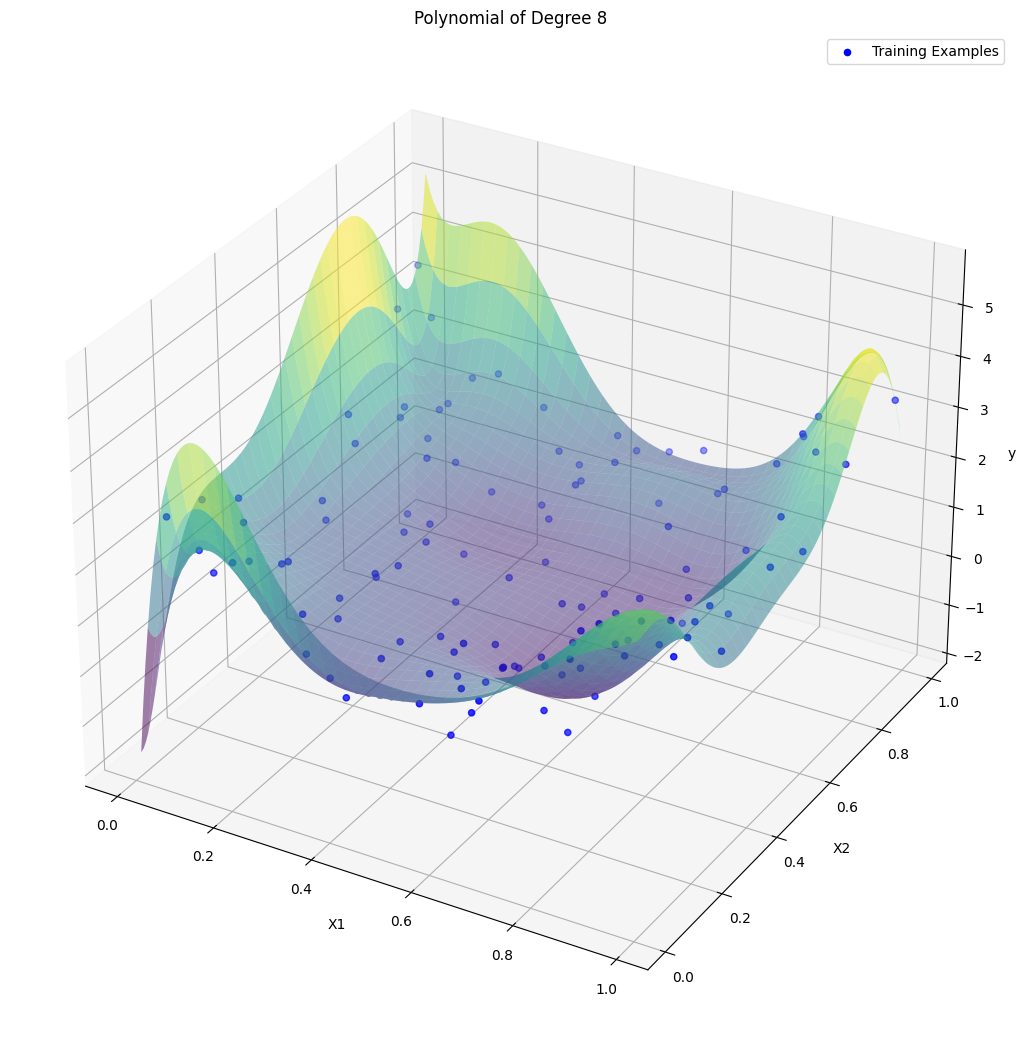

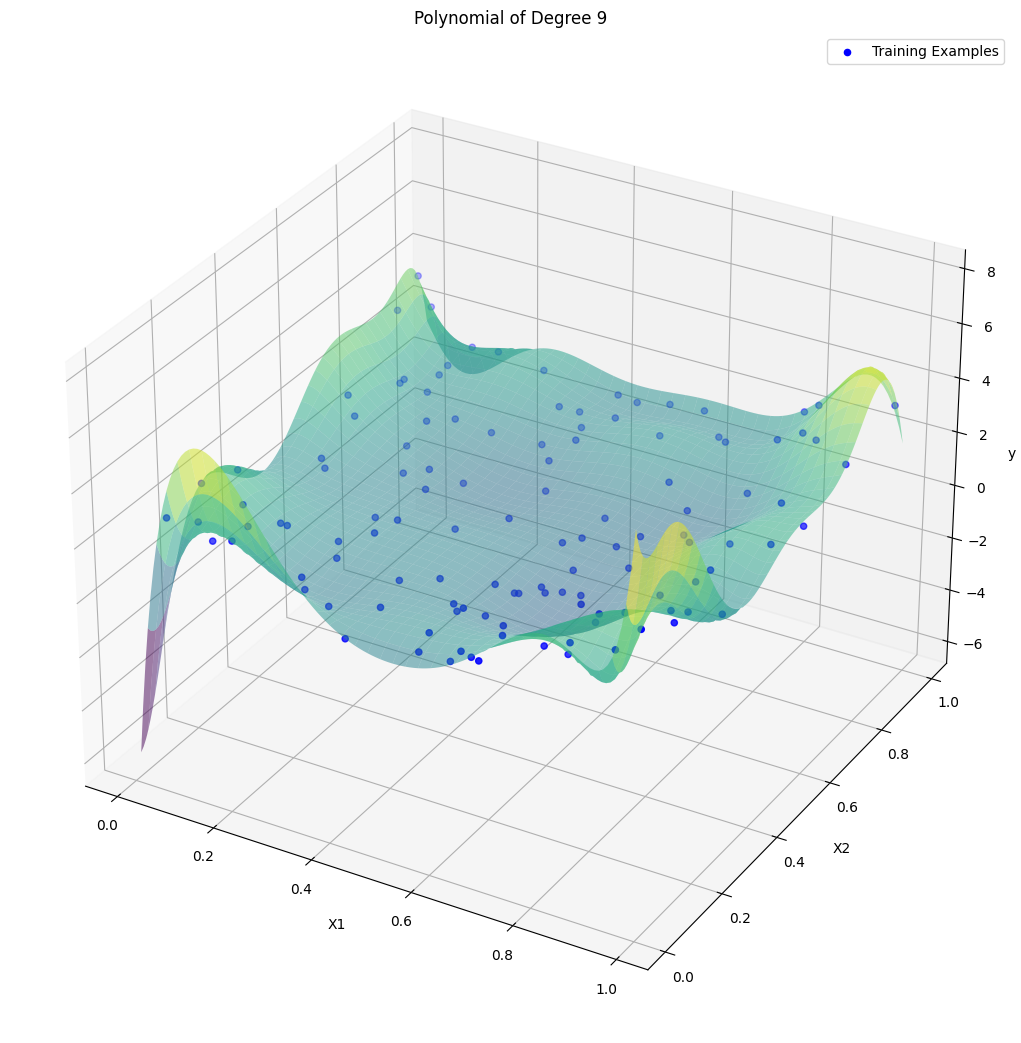

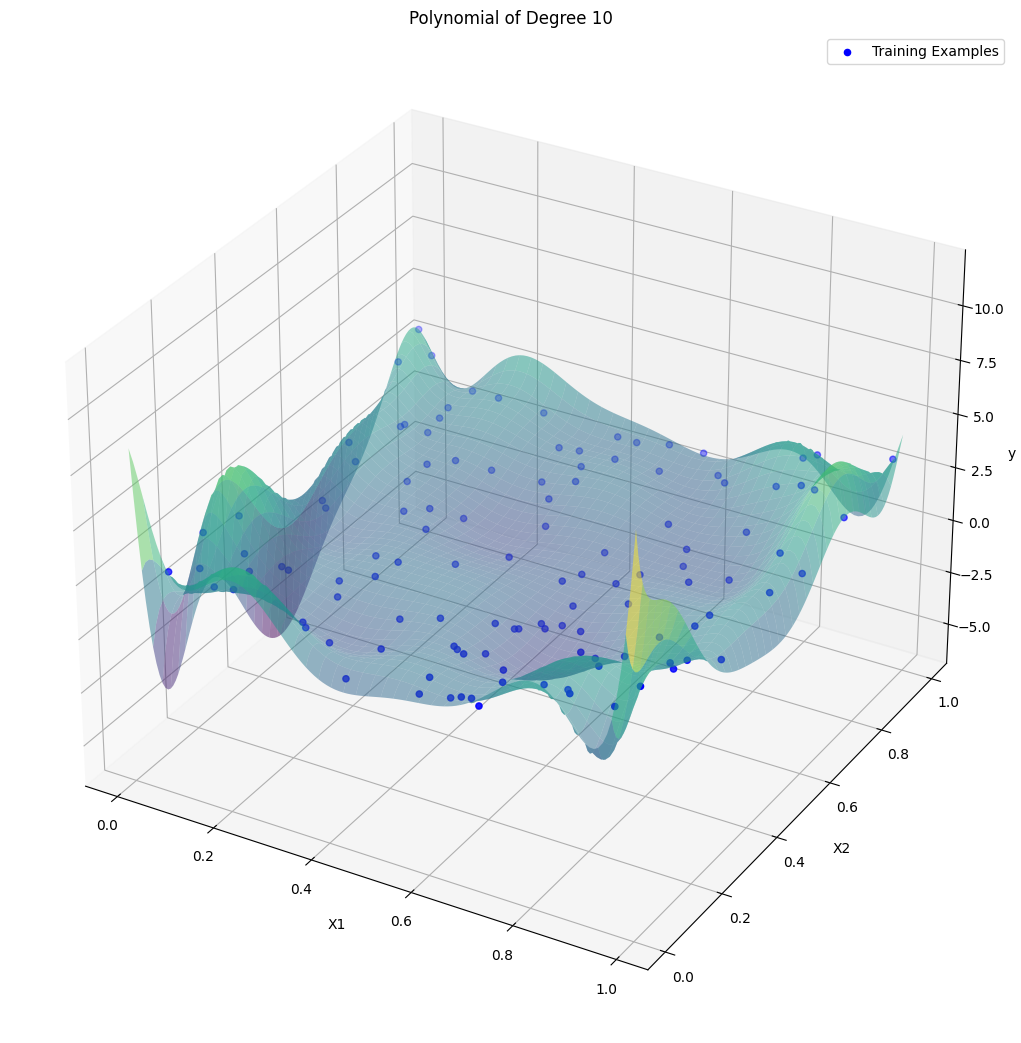

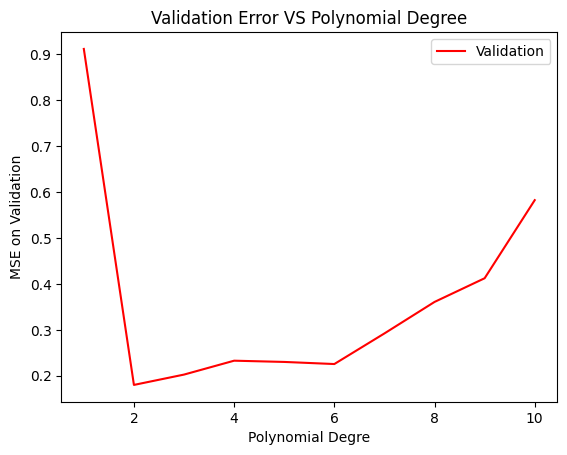

In [77]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

# calculate the MSE in the following function by summing the subtraction of predicted label with actual one then apply power of two and finally divide by the number of labels (mean)
def MeanSquaredError(y_actual, y_predict):
    mse = 0
    for i in range(len(y_actual)):
        mse += (y_predict[i] - y_actual[i]) ** 2
    mse /= len(y_actual)
    return mse


# Create a meshgrid for plotting the surface
x = np.linspace(min(training_set['x1']), max(training_set['x1']), len(training_set['x1']))
y = np.linspace(min(training_set['x2']), max(training_set['x2']), len(training_set['x2']))
x, y = np.meshgrid(x, y)

degree = []
validation_error = []
for i in range(1, 11):
  PF = PolynomialFeatures(i)
  model = PF.fit_transform(training_set[['x1', 'x2']].to_numpy())
  validation_added_features = PF.transform(validation_set[['x1', 'x2']].to_numpy())
  # fit_intercept=False because the bias is added as feature in polynomial featrues function (x0 is now feature in data so there is no need for intercept) explained bellow this code
  LR = LinearRegression(fit_intercept=False).fit(model ,training_set['y'].values)
  predicted_labels = LR.predict(validation_added_features)
  error = MeanSquaredError(validation_set['y'].to_numpy(), predicted_labels)
  validation_error.append(error)
  degree.append(i)
  # Plot the surface of the learned function alongside with the training examples
  fig = plt.figure(figsize = (15, 13))
  axes = fig.add_subplot(111, projection='3d')
  z = LR.predict(PF.transform(np.column_stack([x.ravel(), y.ravel()])))
  z = z.reshape(x.shape)
  axes.scatter(training_set['x1'], training_set['x2'], training_set['y'], label='Training Examples', color='blue')
  # Add legend
  axes.legend()
  axes.plot_surface(x, y, z, alpha=0.5, cmap='viridis', label=f'Degree {i} Surface')

  # Set labels for x, y, and z axes
  axes.set_xlabel('X1')
  axes.set_ylabel('X2')
  axes.set_zlabel('y')


  # Set the title
  axes.set_title(f'Polynomial of Degree {i}')


plt.show()

# comments for testing purpose
# print(degree)
# print(validation_error)

plt.plot(degree, validation_error, c='r', label='Validation')
plt.legend()
plt.title("Validation Error VS Polynomial Degree")
plt.xlabel('Polynomial Degre')
plt.ylabel('MSE on Validation')
plt.show()


I can conclude from the curve that the polynomial with degree = 2 is the least MSE on validation data which means that this is the most proper model. **The best model is the polynomial with degree = 2**

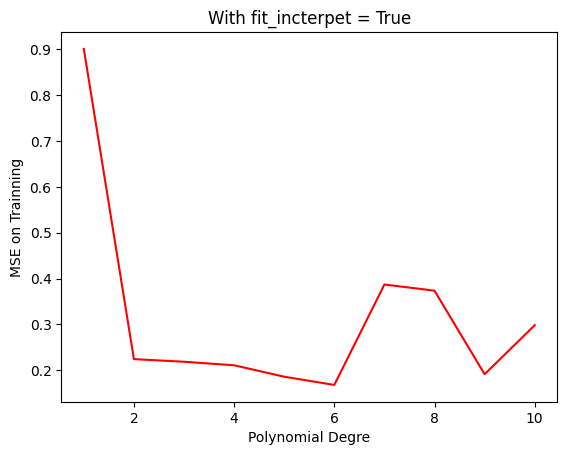

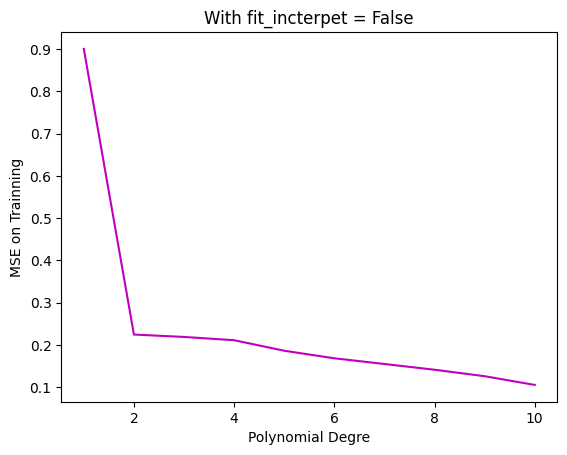

In [78]:
# to check if i must choose fit_intercept parameter for linear regression as false or true i fit the model on training example
# and then apply the learned model on same training example (the result must be if i increase the polynomial degree the error must decrease (overfitting))
degree = []
training_error_with_intercept = []
training_error_without_intercept = []
for i in range(1, 11):
  PF = PolynomialFeatures(i)
  model = PF.fit_transform(training_set[['x1', 'x2']])
  # whith fit_intercept parameter
  LR = LinearRegression().fit(model ,training_set['y'].values)
  predicted_labels = LR.predict(model)
  error = MeanSquaredError(training_set['y'].to_numpy(), predicted_labels)
  training_error_with_intercept.append(error)
  # whithout fit_intercept parameter (False)
  LR = LinearRegression(fit_intercept=False).fit(model ,training_set['y'].values)
  predicted_labels = LR.predict(model)
  error = MeanSquaredError(training_set['y'].to_numpy(), predicted_labels)
  training_error_without_intercept.append(error)
  degree.append(i)


plt.plot(degree, training_error_with_intercept, c='r')
plt.title("With fit_incterpet = True")
plt.xlabel('Polynomial Degre')
plt.ylabel('MSE on Trainning')
plt.show()
plt.plot(degree, training_error_without_intercept, c='m')
plt.title("With fit_incterpet = False")
plt.xlabel('Polynomial Degre')
plt.ylabel('MSE on Trainning')
plt.show()


I can conclude that when fit_intercept parameter is equal False the model is good and accepted (as the polynomial degree increase the model goes to overfitting) (The error is decrease more and more)
This is why i choose fit_intercept = False in the learning model parameters

0.001 	 0.21328279933162908
0.005 	 0.211030576255473
0.01 	 0.21000748257043278
0.1 	 0.23731679848672277
10.0 	 0.5086522825651429


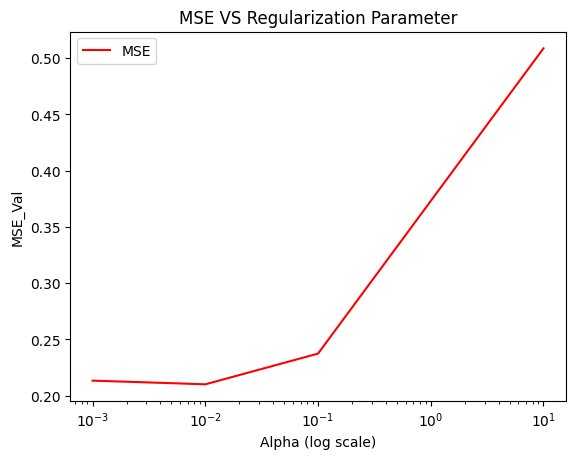

In [79]:
from sklearn.linear_model import Ridge

regularization_parameters = np.array([0.001, 0.005, 0.01, 0.1, 10])


# make the model polynomial of degree 8
PF = PolynomialFeatures(8)

model = PF.fit_transform(training_set[['x1', 'x2']])
validation_degree_8 = PF.transform(validation_set[['x1', 'x2']])

validation_error = []
for alpha in regularization_parameters:
  ridgeregression = Ridge(alpha, fit_intercept=False)
  ridgeregression.fit(model, training_set['y'])
  # print(ridgeregression.coef_)
  predicted_actual_label = ridgeregression.predict(validation_degree_8)
  error = MeanSquaredError(validation_set['y'].to_numpy(), predicted_actual_label)
  validation_error.append(error)
  print(alpha, "\t", error)


plt.plot(regularization_parameters, validation_error, c='r', label='MSE')
plt.xscale('log')  # Set logarithmic scale for the x-axis
plt.legend()
plt.title("MSE VS Regularization Parameter")
plt.xlabel('Alpha (log scale)')
plt.ylabel('MSE_Val')
plt.show()


I can't determine the least MSE from the plot because the values seem to be close to each other, so I print the error with each regularization parameter and I find that the regularization = 0.01 is the best parameter wich has the least MSE on validation data.

# **Part 2: Logistic Regression**


In [70]:
import pandas as pd
Training_set = pd.read_csv("train_cls.csv")
print(Training_set)
Testing_set = pd.read_csv("test_cls.csv")
print(Testing_set)

      x1    x2 class
0   0.30  0.69    C1
1  -0.77  0.55    C1
2  -0.14  0.89    C1
3  -0.85  0.92    C1
4  -0.26  0.69    C1
..   ...   ...   ...
57  0.32  0.38    C2
58  0.02  0.42    C2
59  0.27  0.33    C2
60  0.25  0.28    C2
61 -0.08 -0.27    C2

[62 rows x 3 columns]
      x1    x2 class
0  -0.59  0.80    C1
1   0.49  0.65    C1
2   0.06  0.95    C1
3  -0.25 -0.21    C2
4  -0.04 -0.71    C1
5  -0.86  0.22    C1
6   0.99 -0.47    C1
7  -0.03  0.89    C1
8  -0.66 -0.93    C1
9  -0.08 -0.45    C1
10  0.41  0.65    C1
11 -0.63 -0.78    C1
12 -0.03  0.01    C2
13 -0.28  0.07    C2
14  0.06  0.10    C2
15  0.47 -0.00    C2
16  0.53 -0.20    C2
17 -0.02 -0.16    C2
18  0.53  0.12    C2
19  0.33 -0.02    C2
20  0.61 -0.03    C2
21  0.24 -0.32    C2


read the training and testing data.

In [71]:
# Change C1 --> 0, C2 --> 1
def changeLabel(Label):
    if Label == 'C1':
        return 0
    else:
        return 1

# Apply the label transformation to the 'class' column
Training_set['class'] = Training_set['class'].apply(changeLabel)
Testing_set['class'] = Testing_set['class'].apply(changeLabel)

change the labels from C1 -> 0 and C2 -> 1 **for plotting contour purpose (in bellow section)**

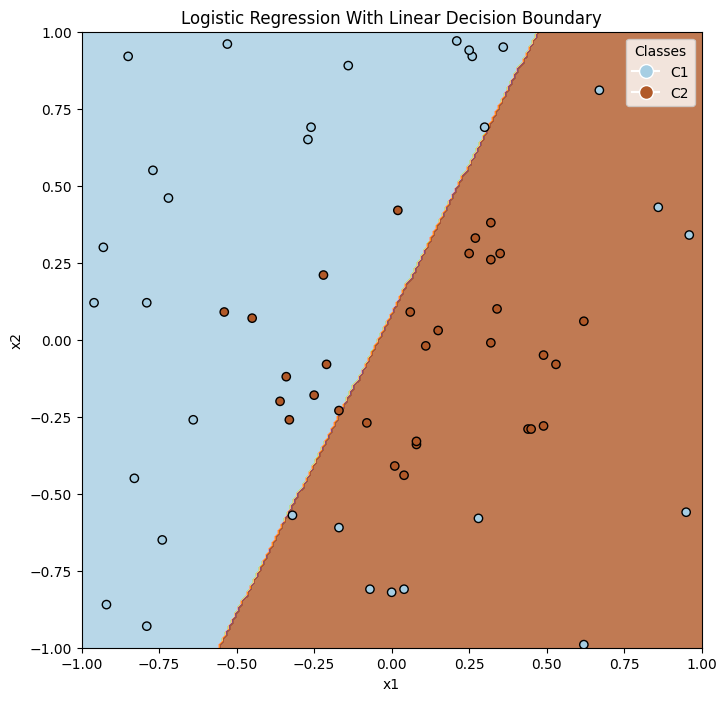

The accuracy on Training set = 66.13%
The accuracy on Testing set = 68.18%


In [72]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Polynomial feature transformation for adding the bias featrue (x0)
degree = 1
PF = PolynomialFeatures(degree)
# fit then transform on trainning data to add the bias column
expand_data_train = PF.fit_transform(Training_set[['x1', 'x2']].to_numpy())
# transform the testing data to be with bias column (x0)
expand_data_test = PF.transform(Testing_set[['x1', 'x2']].to_numpy())

# Create a meshgrid for plotting the decision boundary
x1_min, x1_max = Training_set['x1'].min() - 1, Training_set['x1'].max() + 1
x2_min, x2_max = Training_set['x2'].min() - 1, Training_set['x2'].max() + 1
x1_coordinates, x2_coordinates = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

# Train the logistic regression model with intercept because the data dont have intercept (x0)
model = LogisticRegression(fit_intercept=False)
model.fit(expand_data_train, Training_set['class'].to_numpy())


# Predict the class for each point in the meshgrid
expanded_meshgrid = PF.transform(np.c_[x1_coordinates.ravel(), x2_coordinates.ravel()])
predicted_class = model.predict(expanded_meshgrid)
predicted_class = predicted_class.reshape(x1_coordinates.shape)


plt.figure(figsize = (8, 8))
# Set x-axis and y-axis limits to -1 to 1
plt.xlim([-1, 1])
plt.ylim([-1, 1])

# Plot the decision boundary
plt.contourf(x1_coordinates, x2_coordinates, predicted_class, cmap='Paired', alpha=0.8)

# Plot the data points with different colors for different classes
scatter = plt.scatter(Training_set['x1'], Training_set['x2'], c=Training_set['class'], edgecolors='k', cmap='Paired')

# change the label from 0 to C1 and from 1 to C2 for printing label correctly
# Get unique class labels from the training set
unique_labels = Training_set['class'].unique()

# Create a custom legend with labels 'C1' and 'C2'
legend_labels = ['C1', 'C2']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10) for label in unique_labels]

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression With Linear Decision Boundary')
# Add the legend with custom labels
plt.legend(legend_handles, legend_labels, title='Classes')
plt.show()

# define function to calculate the accuracy using confusion matrix
def accuracy(actual_label, predicted_label):

    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0

    for p in range(len(predicted_label)):
        if actual_label[p] == 1 and predicted_label[p] == actual_label[p]:  # if the predicted value is 1 and the same as label (TP)
            true_positive += 1
        elif actual_label[p] == 1 and predicted_label[p] == 0:  # if the predicted value is 0 and not the same as label (FP)
            false_positive += 1
        elif actual_label[p] == 0 and predicted_label[p] == actual_label[p]:  # if the predicted value is 0 and the same as label (TN)
            true_negative += 1
        else:  # if the predicted value is 0 and not the same as label (FN)
            false_negative += 1
    acc = 0
    # print(true_positive, false_positive, true_negative, false_negative) # for testing
    acc = (true_positive + true_negative) / (true_positive + false_positive + true_negative + false_negative)

    return round(acc * 100, 2)

predicted_train = model.predict(expand_data_train)
# print(predicted_train)
# print(Training_set['class'].to_numpy())

print(f"The accuracy on Training set = {accuracy(Training_set['class'], predicted_train)}%")


predicted_test = model.predict(expand_data_test)
# print(predicted_test)
# print(Testing_set['class'].to_numpy())

print(f"The accuracy on Testing set = {accuracy(Testing_set['class'], predicted_test)}%")



The decision boundary is linear **but the data seems to be not linearliy seprable** so **the model is underfitting** and the accuracy is not high. To add, the data seem to have circular distribution so the linear logistic regression does not separate the data good.

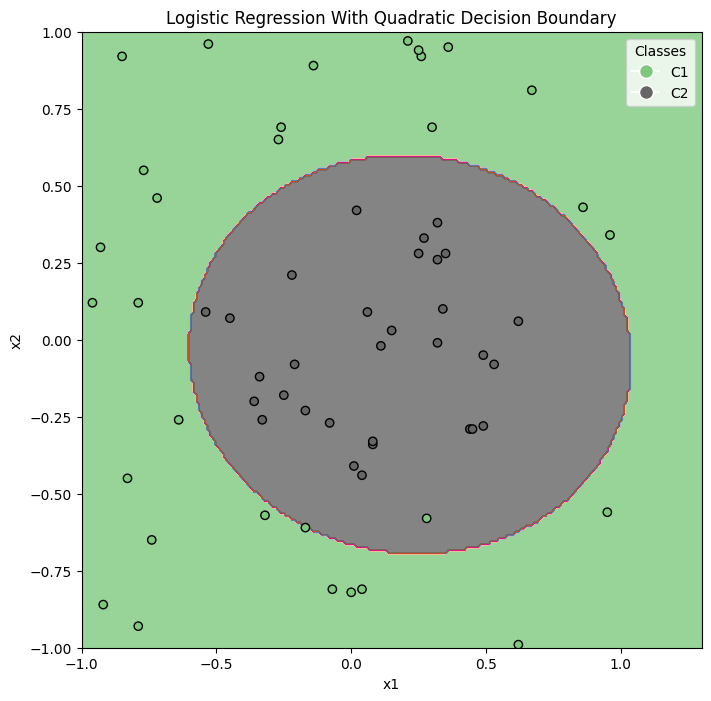

The accuracy on Training set = 98.39%
The accuracy on Testing set = 95.45%


In [73]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


# Polynomial feature transformation
degree = 2 # the degree 2 because i need to learn a quadratic model
PF = PolynomialFeatures(degree)
expand_data_training = PF.fit_transform(Training_set[['x1', 'x2']].to_numpy())

expand_data_testing = PF.transform(Testing_set[['x1', 'x2']].to_numpy())

# Create a meshgrid for plotting the decision boundary
x1_min, x1_max = Training_set['x1'].min() - 1, Training_set['x1'].max() + 1
x2_min, x2_max = Training_set['x2'].min() - 1, Training_set['x2'].max() + 1
x1_coordinates, x2_coordinates = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

# Train the logistic regression model with fit_intercept parameter = false
model = LogisticRegression(fit_intercept=False)
model.fit(expand_data_training, Training_set['class'].to_numpy())

# Predict the class for each point in the meshgrid
expanded_meshgrid = PF.transform(np.c_[x1_coordinates.ravel(), x2_coordinates.ravel()])
predicted_class = model.predict(expanded_meshgrid)
predicted_class = predicted_class.reshape(x1_coordinates.shape)

plt.figure(figsize = (8, 8))
# limit the x and y-axises
plt.xlim([-1, 1.3])
plt.ylim([-1, 1])

# Plot the decision boundary
plt.contourf(x1_coordinates, x2_coordinates, predicted_class, cmap='Accent', alpha=0.8)

# Plot the data points with different colors for different classes
scatter = plt.scatter(Training_set['x1'], Training_set['x2'], c=Training_set['class'], edgecolors='k', cmap='Accent')

# change the label from 0 to C1 and from 1 to C2 for printing label correctly
# Get unique class labels from the training set
unique_labels = Training_set['class'].unique()

# Create a custom legend with labels 'C1' and 'C2'
legend_labels = ['C1', 'C2']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10) for label in unique_labels]
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression With Quadratic Decision Boundary')
plt.legend(legend_handles, legend_labels, title='Classes')

plt.show()

predicted_train = model.predict(expand_data_training )
# the bellow two comments used for testing to see the accuracy and check if the predicted label as actual (ground truth)
# print(predicted_train)
# print(Training_set['class'].to_numpy())

print(f"The accuracy on Training set = {accuracy(Training_set['class'], predicted_train)}%")


predicted_test = model.predict(expand_data_testing)
# print(predicted_test)
# print(Testing_set['class'].to_numpy())

print(f"The accuracy on Testing set = {accuracy(Testing_set['class'], predicted_test)}%")


**The model is good and accepted** for both training data and testing data, also the data dont have neither underfitting nor overfitting. but the data may be overfitting for both training and testing if the data is not collected very well.
**in my situation the model is good more than linear one and can be used as optimal model for predicting new examples.**